C:\Users\multicampus\Anaconda3\envs\now\lib\site-packages\torch\nn\functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
C:\Users\multicampus\Anaconda3\envs\now\lib\site-packages\torch\nn\functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
C:\Users\multicampus\Anaconda3\envs\now\lib\site-packages\torch\nn\functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
C:\Users\multicampus\A

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


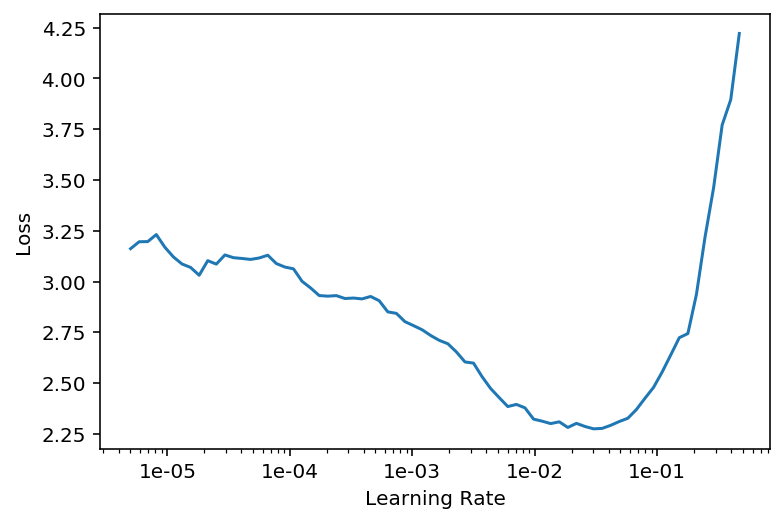

In [1]:
# 공통 코드입니다.

%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob

from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns



path = Path(os.getcwd())/"data"
path

tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)

learn = create_cnn(data,models.resnet34,metrics=error_rate)

learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()



In [2]:
# (2) 모델을 생성하기 위한 코드입니다. 1~5 cycle 코드입니다. (주의사항 : 시간이 짧지 않습니다.)

answer = {}

for xx in range(1,6):
       
    learn.fit_one_cycle(xx,max_lr=5.13e-03) 

    interp = ClassificationInterpretation.from_learner(learn) 
    losses,idxs = interp.top_losses()
    doc(interp.plot_top_losses)

    preds = learn.get_preds(ds_type=DatasetType.Test)
    max_idxs = np.asarray(np.argmax(preds[0],axis=1))
    yhat = []
    for max_idx in max_idxs:
        yhat.append(data.classes[max_idx])
    y = []

    ## convert POSIX paths to string first
    for label_path in data.test_ds.items:
        y.append(str(label_path))

    ## then extract waste type from file path
    pattern = re.compile("([a-z]+)[0-9]+")
    for i in range(len(y)):
        y[i] = pattern.search(y[i]).group(1)
    cm = confusion_matrix(y,yhat)
    print(cm)
    correct = 0

    for r in range(len(cm)):
        for c in range(len(cm)):
            if (r==c):
                correct += cm[r,c]
    accuracy = correct/sum(sum(cm))
    answer.update({xx:accuracy})
    print(answer)
    learn.save(f'{xx}_cycle')
    
print(answer)

[[ 93   1   3   4   0   0]
 [  1 103  12   0  10   0]
 [  0   4  94   1   2   2]
 [  0   0   0 147   0   2]
 [  0   6   0   0 111   4]
 [  1   0   0   4   0  30]]
{1: 0.7826771653543307, 2: 0.8551181102362204, 3: 0.8771653543307086, 4: 0.878740157480315, 5: 0.9102362204724409}
{1: 0.7826771653543307, 2: 0.8551181102362204, 3: 0.8771653543307086, 4: 0.878740157480315, 5: 0.9102362204724409}


In [7]:
# (2) 확장입니다. :: 6부터 계속 확장중입니다. 

answer = {}
xx = 6
while True:
         
    learn.fit_one_cycle(xx,max_lr=5.13e-03) 

    interp = ClassificationInterpretation.from_learner(learn) 
    losses,idxs = interp.top_losses()
    doc(interp.plot_top_losses)

    preds = learn.get_preds(ds_type=DatasetType.Test)
    max_idxs = np.asarray(np.argmax(preds[0],axis=1))
    yhat = []
    for max_idx in max_idxs:
        yhat.append(data.classes[max_idx])
    y = []

    ## convert POSIX paths to string first
    for label_path in data.test_ds.items:
        y.append(str(label_path))

    ## then extract waste type from file path
    pattern = re.compile("([a-z]+)[0-9]+")
    for i in range(len(y)):
        y[i] = pattern.search(y[i]).group(1)
    cm = confusion_matrix(y,yhat)
    print(cm)
    correct = 0

    for r in range(len(cm)):
        for c in range(len(cm)):
            if (r==c):
                correct += cm[r,c]
    accuracy = correct/sum(sum(cm))
    answer.update({xx:accuracy})
    print(answer)
    learn.save(f'{xx}_cycle')
    xx += 1


[[ 97   0   0   3   1   0]
 [  0 106  11   0   9   0]
 [  0   9  93   0   0   1]
 [  0   0   1 144   2   2]
 [  0   3   0   1 116   1]
 [  0   0   1   2   3  29]]
{6: 0.9133858267716536, 7: 0.9086614173228347, 8: 0.9244094488188976, 9: 0.9212598425196851}


epoch,train_loss,valid_loss,error_rate,time
0,0.144647,0.205231,0.060317,01:24
1,0.183388,0.312437,0.095238,01:24


KeyboardInterrupt: 

In [14]:
# (3) 저장한 모델을 불러오는 것입니다.
result = {}
for xx in range(1,10):
    learn1 = learn.load(f'{xx}_cycle')

    preds = learn1.get_preds(ds_type=DatasetType.Test)
    max_idxs = np.asarray(np.argmax(preds[0],axis=1))
    yhat = []
    for max_idx in max_idxs:
        yhat.append(data.classes[max_idx])
    y = []

    ## convert POSIX paths to string first
    for label_path in data.test_ds.items:
        y.append(str(label_path))

    ## then extract waste type from file path
    pattern = re.compile("([a-z]+)[0-9]+")
    for i in range(len(y)):
        y[i] = pattern.search(y[i]).group(1)
    cm = confusion_matrix(y,yhat)
    print(cm)
    correct = 0

    for r in range(len(cm)):
        for c in range(len(cm)):
            if (r==c):
                correct += cm[r,c]
    accuracy = correct/sum(sum(cm))
#     print(accuracy)
    # print(answer)
    result.update({xx:accuracy})
    print(result)
print(result)

[[ 97   0   0   3   1   0]
 [  0 106  11   0   9   0]
 [  0   9  93   0   0   1]
 [  0   0   1 144   2   2]
 [  0   3   0   1 116   1]
 [  0   0   1   2   3  29]]
{1: 0.7826771653543307, 2: 0.8551181102362204, 3: 0.8771653543307086, 4: 0.878740157480315, 5: 0.9102362204724409, 6: 0.9133858267716536, 7: 0.9086614173228347, 8: 0.9244094488188976, 9: 0.9212598425196851}
{1: 0.7826771653543307, 2: 0.8551181102362204, 3: 0.8771653543307086, 4: 0.878740157480315, 5: 0.9102362204724409, 6: 0.9133858267716536, 7: 0.9086614173228347, 8: 0.9244094488188976, 9: 0.9212598425196851}


In [16]:
# (4) 저장한 모델을 불러오고, 캔들이 들어있는 image를 확인할 것입니다.
# (1) 하고 (4)를 하세요
box = []
images = glob(f'{path}/can/*.jpg')
print('전체 이미지 갯수 :', len(images))

for xx in range(1, 10):
    learn1 = learn.load(f'{xx}_cycle')
    result = {}
    
    for i in images:
        answer = learn1.predict(open_image(i))[0]

        if answer.obj not in result.keys():
            result.update({answer.obj:1})
        else:
            result[answer.obj]+=1
    box.append(result)
    print(round(result['metal']/len(images), 4), result)
print()
print(box)

전체 이미지 갯수 : 515
0.6311 {'cardboard': 73, 'glass': 28, 'paper': 43, 'metal': 325, 'plastic': 42, 'trash': 4}
0.5262 {'paper': 156, 'metal': 271, 'plastic': 38, 'cardboard': 17, 'glass': 31, 'trash': 2}
0.3592 {'metal': 185, 'paper': 243, 'plastic': 28, 'glass': 32, 'cardboard': 26, 'trash': 1}
0.3903 {'paper': 258, 'metal': 201, 'plastic': 25, 'trash': 5, 'glass': 16, 'cardboard': 10}
0.3515 {'metal': 181, 'paper': 267, 'plastic': 28, 'cardboard': 27, 'glass': 10, 'trash': 2}
0.2291 {'paper': 311, 'plastic': 33, 'metal': 118, 'cardboard': 48, 'glass': 4, 'trash': 1}
0.299 {'paper': 232, 'cardboard': 50, 'metal': 154, 'plastic': 56, 'trash': 8, 'glass': 15}
0.235 {'paper': 283, 'plastic': 49, 'metal': 121, 'cardboard': 42, 'glass': 18, 'trash': 2}
0.3107 {'metal': 160, 'glass': 23, 'paper': 257, 'plastic': 48, 'cardboard': 25, 'trash': 2}

[{'cardboard': 73, 'glass': 28, 'paper': 43, 'metal': 325, 'plastic': 42, 'trash': 4}, {'paper': 156, 'metal': 271, 'plastic': 38, 'cardboard': 17, 'g